In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import os
os.chdir("..")

import numpy as np
from sklearn.metrics import roc_auc_score

'D:\\DoingDataScience\\mixed-anomaly'

In [2]:
from anomaly.isolation.isolation_forest import IsolationForest
from anomaly.datasets.kdd import load_train_test_data

In [3]:
(features_train, target_train), (features_test, target_test) = load_train_test_data(small=True, train_normal_only=False)

In [36]:
isolation_forest = IsolationForest(number_trees=200, sample_n=1024)

In [37]:
isolation_forest.fit(features_train)

100%|████████████████████████████████████████| 200/200 [10:52<00:00,  3.58s/it]


In [39]:
anomaly_scores = isolation_forest.calculate_anomaly_scores(data=features_test)
anomaly_scores_normal_test = anomaly_scores[target_test == 1]
anomaly_scores_anomaly_test = anomaly_scores[target_test == 0]

(array([ 23., 140.,   9.,   7.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   2.,   0.,   3.,   0.,   0.,   1.,   7.,   9.,
         12.,  12.,   7.,   3.,   4.,   1.,   3.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.58714792, 0.58826735, 0.58938678, 0.59050621, 0.59162565,
        0.59274508, 0.59386451, 0.59498394, 0.59610338, 0.59722281,
        0.59834224, 0.59946167, 0.6005811 , 0.60170054, 0.60281997,
        0.6039394 , 0.60505883, 0.60617827, 0.6072977 , 0.60841713,
        0.60953656, 0.61065599, 0.61177543, 0.61289486, 0.61401429,
        0.61513372, 0.61625316, 0.61737259, 0.61849202, 0.61961145,
        0.62073088, 0.62185032, 0.62296975, 0.62408918, 0.62520861,
        0.62632805, 0.62744748, 0.62856691, 0.62968634, 0.63080577,
        0.63192521, 0.63304464, 0.63416407, 0.6352835 , 0.63640294,
        0.63752237, 0.6386418 , 0.63976123, 0.

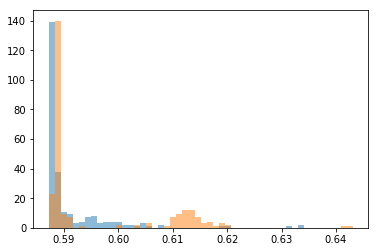

In [42]:
bins = np.histogram(a=anomaly_scores, bins=50)[1]
plt.close()
plt.hist(anomaly_scores_normal_test.sample(n=len(anomaly_scores_anomaly_test)), alpha=0.5, bins=bins)
plt.hist(anomaly_scores_anomaly_test, alpha=0.5, bins=bins)

In [43]:
np.mean(anomaly_scores_normal_test), np.mean(anomaly_scores_anomaly_test)

(0.5896535680493312, 0.595467140176504)

In [44]:
roc_auc_score(y_true=1-target_test, y_score=anomaly_scores)

0.6925461254612546

In [35]:
def shannon_entropy_calculation(p):
    entropy = 0
    for probability in p:
        entropy = entropy + probability * np.log(probability)
    return - np.log(len(p)) - entropy

shannon_entropy_calculation([0.1, 0.1, 0.1, 0.1, 0.6])# / entropy_calculation([0.2] * 5)

-0.38190850097688767